# 8. Beards Through Time

```{sidebar} Datasets & APIs
  * Met Museum [API](https://metmuseum.github.io/) and collections data
  * V&A [API](https://developers.vam.ac.uk/guide/v2/) and collections data
```

With the inaccesibility of barbers and hairdressers for much of the last year due to world events, as one shaves and cut's ones own hair, one's thoughts naturally turn to depictions of beards in historical objects. Let's see what inspiration for home beard styling we can take from the Met and V&A collections.

In [12]:
import sys
sys.path.append("/srv/explore-the-collections/code/ivpy/src/")

## Beards at the Met

The Met API lets us [search](https://metmuseum.github.io/#search) amongst it's objects, returning a list of object identifers we can then use to get further details for each object.

In [16]:
import requests
import pandas as pd
import csv

req = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=beard')

met_summer_object_ids = req.json()['objectIDs']
met_summer_objects = []
max_objects = 20
count = 0

for obj_id in met_summer_object_ids:
    
    req = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{obj_id}')
    obj_data = req.json()
    
    met_summer_objects.append([obj_data['objectID'], obj_data['title'], obj_data['objectName'], obj_data['medium'], obj_data['artistDisplayName'], obj_data['accessionYear'], obj_data['primaryImageSmall']])
    
    if count > max_objects:
        break
    else:
        count += 1
        
met_summer_objects_df = pd.DataFrame(data=met_summer_objects, columns=['Object ID','Title', 'Object', 'Medium', 'Artist', 'Accession Year', 'Thumbnail'])
met_summer_objects_df

,Object ID,Title,Object,Medium,Artist,Accession Year,Thumbnail
0,242408,Limestone head of a bearded man,Head of a bearded man,Limestone,,1874,https://images.metmuseum.org/CRDImages/gr/web-...
1,241121,Terracotta figure,"Statuette of a bearded woman (""Bearded Aphrodi...",Terracotta,,1874,https://images.metmuseum.org/CRDImages/gr/web-...
2,552044,"Head of a bearded man wearing a pointed cap, p...","Head, bearded man",Faience,,1917,https://images.metmuseum.org/CRDImages/eg/web-...
3,247001,Marble statue of a bearded Hercules,Statue of Herakles,"Marble, Island",,1903,https://images.metmuseum.org/CRDImages/gr/web-...
4,550783,Beard from a large statue,"Statue attachment, beard","cupreous alloy, glass or vitreous material, go...",,1930,https://images.metmuseum.org/CRDImages/eg/web-...
5,463192,Altar Predella and Socle of Archbishop Don Dal...,Altarpiece,Alabaster with traces of paint and gilding,Francí Gomar,1909,https://images.metmuseum.org/CRDImages/cl/web-...
6,255045,Terracotta bust of a man,Protome of a bearded male,Terracotta,,1959,https://images.metmuseum.org/CRDImages/gr/web-...
7,547233,Figurine of a man,"Statuette, standing man, beard",Ivory (elephant),,1954,https://images.metmuseum.org/CRDImages/eg/web-...
8,547287,Fragmentary Shroud with a Bearded Young Man,"Shroud fragment, bearded man","Linen, tempera paint",,1908,https://images.metmuseum.org/CRDImages/eg/web-...
9,257430,Bronze statuette of a standing male figure,Statuette of a bearded man,Bronze,,2000,https://images.metmuseum.org/CRDImages/gr/web-...


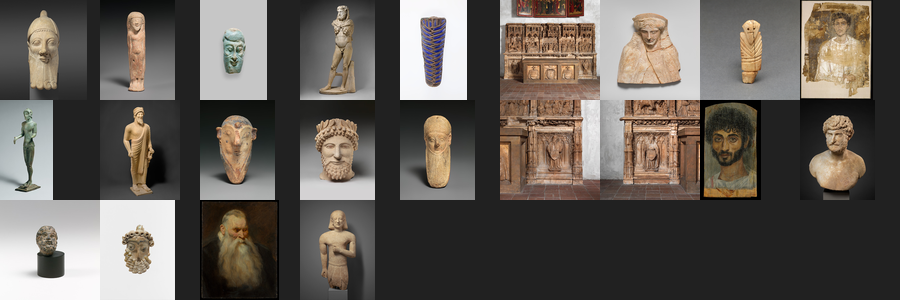

In [17]:
from ivpy import attach,show,compose,montage,histogram,scatter
attach(met_summer_objects_df, "Thumbnail")
show()

Some excellent historical beard inspiration there. 

## Beards at the V&A

In [35]:
import pandas as pd
req = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?q=Beard%20-Collection&images_exist=1&response_format=csv&page_size=50')
req.head(20)

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,S.449-1997,O1138907,Print,Mr. Beard and Miss Brent in Thomas and Sally,London,"Smith, John",vendors,ca. 1770,2010EK1282,paper,printing,NaN,In store,False,False
1,E.1154-2012,O1248826,Daguerreotype,NaN,London,Richard Beard,photographer,1841,2016JC0692,glass,daguerreotype,NaN,In store,False,False
2,E.212-1991,O193659,Print,Chinoise,Great Britain,"Beard, Linda",maker,ca. 1970-1980,2009BX1611,paper,line block,chinoise,"Prints & Drawings Study Room, level C",False,False
3,S.1453-1984,O98226,False beard,False beard,Great Britain,unknown,makers,ca. early 20th century,2019MK5314,hair,wig-making,NaN,In store,False,False
4,S.1452-1984,O98221,False beard,False beard,Great Britain,Unknown,makers,ca. early 20th century,2019MK5310,hair,wig-making,NaN,In store,False,False
5,S.445-1997,O1138903,Print,Mr. Beard in the Character of Hawthorn - in Lo...,London,"Sayer, Robert",vendors,20/12/1769,2010EK1400,paper,printing,NaN,In store,False,False
6,T.48:8-2000,O97069,Packet of sewing needles,NaN,Great Britain,Kirby Beard & Co,manufacturer,1870-1940,2017KA3387,Steel,NaN,NaN,In store,False,False
7,E.921-1924,O766610,Poster,Molesey Regatta,Great Britain,"Beard, Freda",artist,1924,2014HG8840,lithographic ink,colour lithography,NaN,"Prints & Drawings Study Room, level C",False,False
8,E.99-1976,O556729,Poster,Live In The Sun At Welwyn Garden City,Great Britain,"Beard, Freda",artist,c.1920,2014HG8731,NaN,colour lithography,NaN,"Prints & Drawings Study Room, level C",False,False
9,E.140-1925,O764936,Poster,"""The Play's The Thing!"" Go By Underground",Great Britain,"Beard, Freda",artist,circa 1924,2014HG8747,NaN,colour lithography,NaN,"Prints & Drawings Study Room, level C",False,False


In [32]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
req._primaryImageId = [IIIF_IMAGE_URL % item for item in req._primaryImageId]

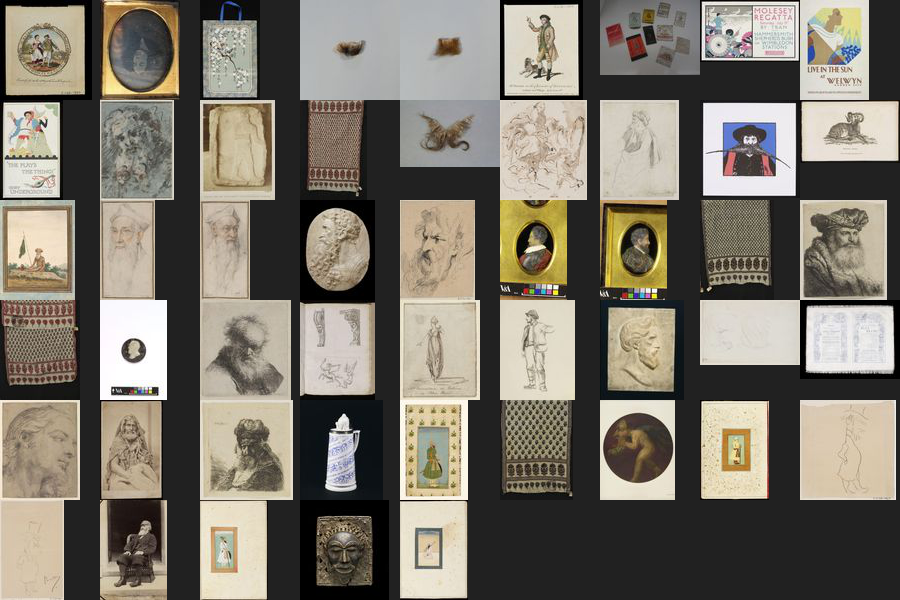

In [33]:
attach(req, "_primaryImageId")
show()

A range of objects there, but still with some excellent beards visible

Lets look now if we can see any trends in beard depictions on objects over the last thousand years.

## Beards over the last millenium - V&A

In [63]:
import pandas as pd

start_century = 1000
end_century = 2100
beard_objects_df = pd.DataFrame()

for century in range(start_century, end_century, 100):
  beard_obj_century = pd.read_json(f'https://api.vam.ac.uk/v2/objects/clusters/object_type/search?q=Beard%20-Collection&year_made_from={century}&year_made_to={century+99}&cluster_size=20')
# Remove some object types with very low counts to make graphic more readable
  beard_obj_century.drop( beard_obj_century[ beard_obj_century['count'] < 5 ].index, inplace=True)
  beard_obj_century['century'] = century 
  beard_objects_df = beard_objects_df.append(beard_obj_century)
    
beard_objects_df.head(20)

,id,value,count,count_max_error,century
0,Panel,Panel,14,0,1300
1,Statuette,Statuette,6,0,1300
2,Relief,Relief,5,0,1300
0,Panel,Panel,124,0,1400
1,Relief,Relief,24,0,1400
2,Statuette,Statuette,19,0,1400
3,Fragment of a panel,Fragment of a panel,8,0,1400
4,Statue,Statue,6,0,1400
5,Figure,Figure,5,0,1400
0,Panel,Panel,103,0,1500


In [64]:
import altair as alt

alt.Chart(beard_objects_df).mark_circle().encode(
    x='century:O',
    y='value:O',
    size='sum(count):Q'
)

alt.Chart(...)

So it seems like the 14th and 15th centuries were a good time for beards on objects in the V&A Collection, things have tailed off a little recently sadly. Let's try the same for the Met. We need to handle the count aggregations ourselves for this (just taking the top 100 objects)

## Beards over the last millenium - Met

In [94]:
import requests
import pandas as pd
import csv
from time import sleep

req = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=beard')

met_summer_object_ids = req.json()['objectIDs']
met_summer_objects = []
max_objects = 20
count = 0

start_century = 1000
end_century = 2100

beard_objects_df = met_beard_centuries_df = pd.DataFrame()

for century in range(start_century, end_century, 100):
  req = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/search?q=beard&dateBegin={century}&dateEnd={century+99}')
  req_json = req.json()

  if req_json['total'] < 1:
    continue

  met_summer_object_ids = req_json['objectIDs']
    
  object_types = {}
  # We just take the top 100 objects (with pauses) to be nice to the Met API server
  nice = 0
  for obj_id in met_summer_object_ids[0:100]:
     
    req = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{obj_id}')
    obj_data = req.json()

    if obj_data['objectName'] in object_types:
      object_types[obj_data['objectName']] += 1
    else:
      object_types[obj_data['objectName']] = 1
    
    if nice > 25:
        sleep(1)
        nice = 0
    else:
        nice += 1
  
  century_df = pd.DataFrame([(type,object_types[type]) for type in object_types], columns=['type', 'count'])
    
  century_df['century'] = century
                   
  met_beard_centuries_df = met_beard_centuries_df.append(century_df)
  
met_beard_centuries_df.head(10)

,type,count,century
0,Handscroll,1,1100
0,Box,1,1200
1,Section from a non-illustrated manuscript,1,1200
0,"Painting, triptych",1,1300
1,"Painting, cassone panel",1,1300
0,Painting,11,1400
1,Relief,1,1400
2,Handscroll,1,1400
3,Missal; Manuscript,1,1400
4,"Painting, diptych",1,1400


In [95]:
import altair as alt

alt.Chart(met_beard_centuries_df).mark_circle().encode(
    x='century:O',
    y='type:O',
    size='sum(count):Q'
)

alt.Chart(...)

So for our sample from the Met, a fairly low but consistent presence of beards in paintings from the 14th century onwards, with an intriguing spike in the 17th century for armchairs 
(more likely due a furniture maker with the name of 'Beard' than a trend for armchairs made from beard hair one assumes, do let us know if you investigate this further).

## Further Beard Studies

An obvious next step would be to run some image analysis on the matched objects to extract and classify beard styles over the millenia. We will return to this important research 
project when time allows.